Вариант $N 24$ Решить с помощью симметрической неявной схемы задачу Коши $y′′′−2y′′+y′−2y= cos(x)·exp(2x)$,   $y(0) = 1, y′(0) = 0$, $y′′(0) = 0,$   $x∈[0,2]$с заданной относительной точностью 0,01.Требуется построение графиков решения $y(x)$, $y′(x)$, а также фазовых траекторий. За своевременное выполнениезадания начисляется 6 баллов.Дополнительные 3 балла будут начислены, если будет найдено точное решение и оно будет сопоставлено (по-строены соответствующие разностные графики) с полученным приближенным решением. Еще 3 балла будут начислены, если решение задачи Коши будет найденно с помощью встроенных функций и оно также будет сопоставлено (построены соответствующие разностные графики) с исходным приближенным решением. Для того, чтобы лабораторная работа была засчитана требуется оформление отчета (с формулами) с описаниемиспользуемых методов в формате Jupyter notebook.

# Лабораторная работа №8. Решение задачи Коши
### Выполнил: Шабалин Иван
Целью данной работы является решение дифференциального уравнения при заданных начальных условиях:
 $y′′′−2y′′+y′−2y= cos(x)e^{2x}$,   $y(0) = 1, y′(0) = 0$, $y′′(0) = 0,$   $x∈[0,2]$с

### Аналитическое Решение:


$y(x)=C_3e^{2x}+C_2sin(x)+C_1cos(x) + \frac{1}{8}(e^{2x}sin(x)-e^{2x}cos(x))$
, где  $С_1=\frac{4}{5} $  $С_2=\frac{-2}{5} $  $С_3=\frac{1}{5} $


### Решение Симметрической неявной схемой

Рассмотрим наше ДУ, переписав его в виде системы (введя обозначения $y_1=y$,
$y_2=y_1'$ $ y_3=y_2'$):

$$
\begin{cases} 
y_1'+(-y_2)=0\\
y_2'+(-y_3)=0\\
y_3'−2y_3+y_2−2y_1= cos(x)·e^{2x}
\end{cases}
$$

Каноническая модельная задача для разностной схемы записывается в виде

$$
\begin{cases} 
u'+A(x)u=\varphi(x), \quad x>0\\
u(0)=u0
\end{cases}
$$

где $\phi(x), u$ - вектора размерности порядка уравнения $s$, а $A(x)$ - матрица $x\times s$. Для нашего ураванения нетрудно видеть, что 

$$
u=\begin{bmatrix} 
y_1\\y_2\\y_3
\end{bmatrix},
\quad
\varphi=\begin{bmatrix} 
0\\0\\cos(x)·e^{2x}
\end{bmatrix},
\quad
A=\begin{bmatrix} 
0 & -1 & 0\\
0 & 0 & -1\\
-2 & 1 & -2
\end{bmatrix}.
$$

Решение задачи Коши **симметричной неявной схемой** осуществляется решением относительно $y_{n+1}$ на каждом шаге ($n$) :

$$
\begin{cases}
\frac{y_{n+1}-y_{n}}{h}+\frac12 A(y_n+y_{n+1})=\varphi_n\\
n=0,1,2,...,\,\,y_0=u_0
\end{cases}
$$

Перепишем систему в виде "$Mx=N$":

$$
(E+\frac12hA)y_{n+1}=h\varphi_n+y_n-\frac12hAy_n
$$
Теперь $y_{n+1}$ находим как:
$$
y_{n+1}=((E+\frac12hA))^{-1}*(h\varphi_n+y_n-\frac12hAy_n)
$$

6.103515625e-05


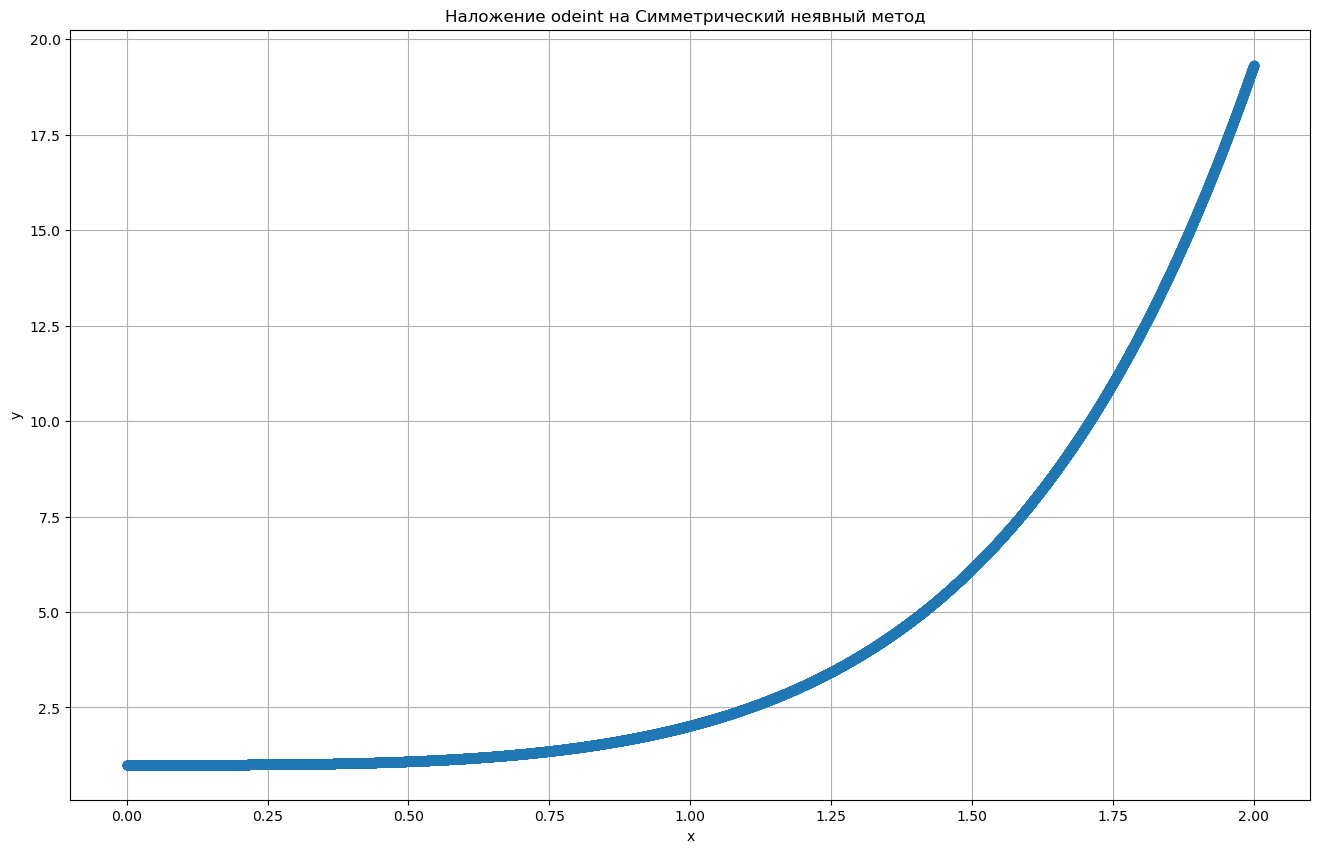

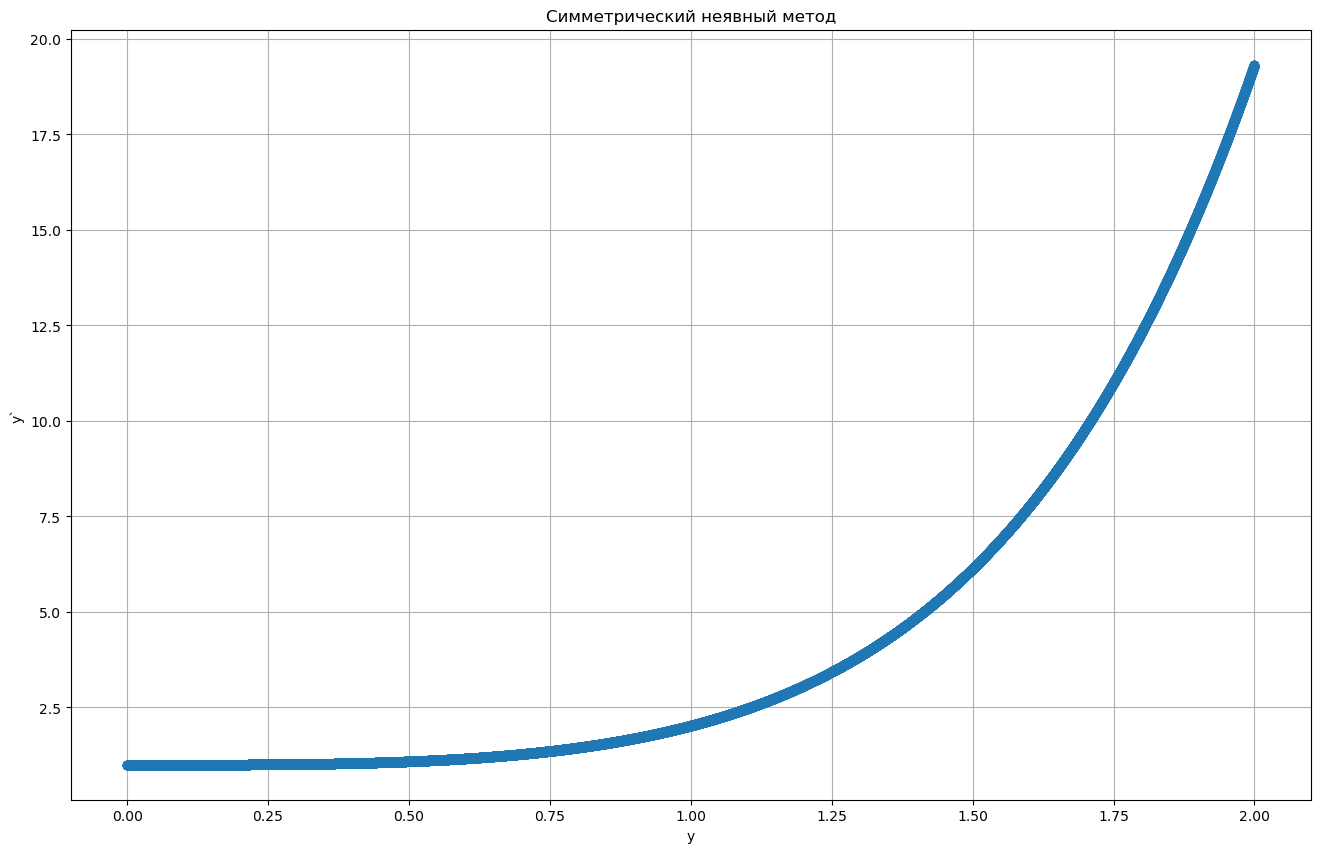

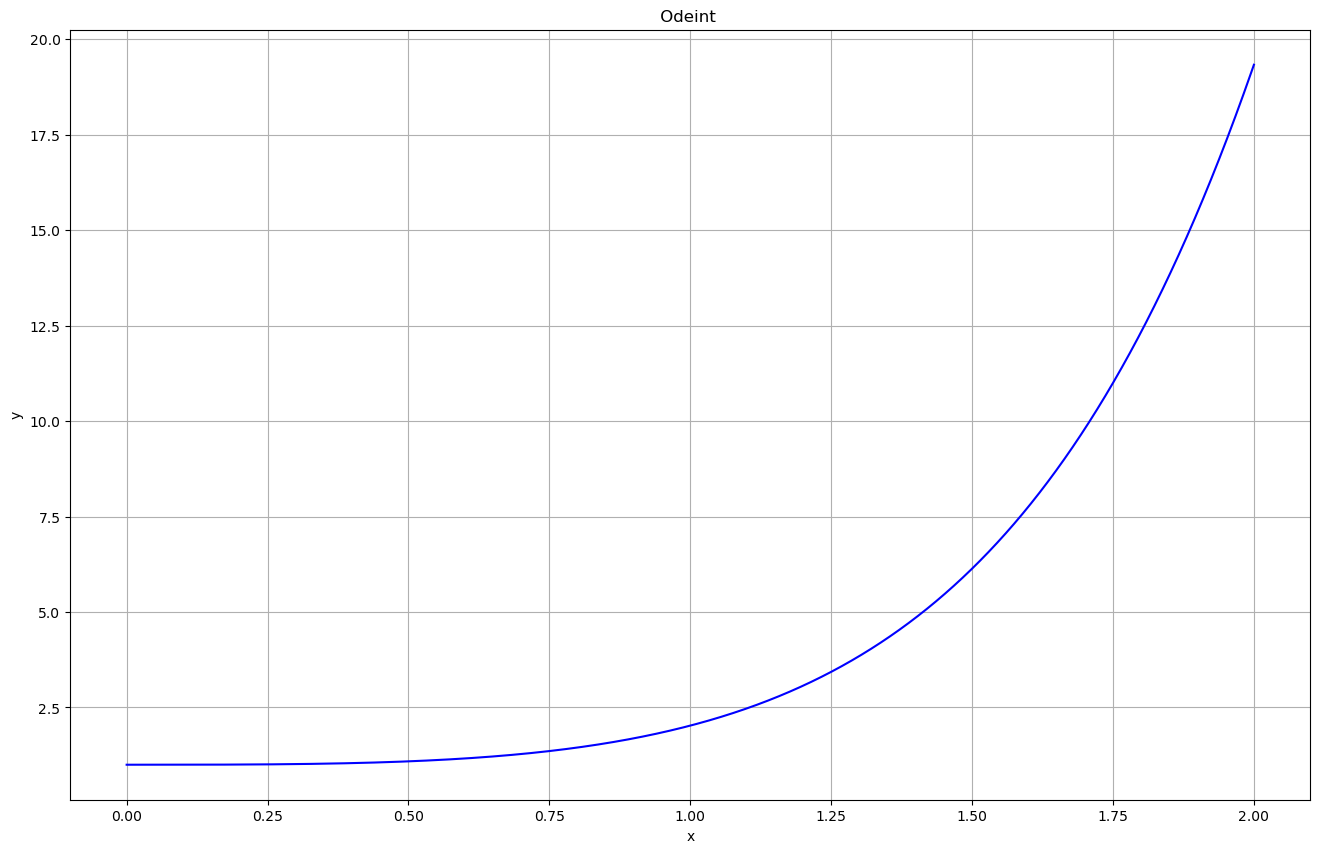

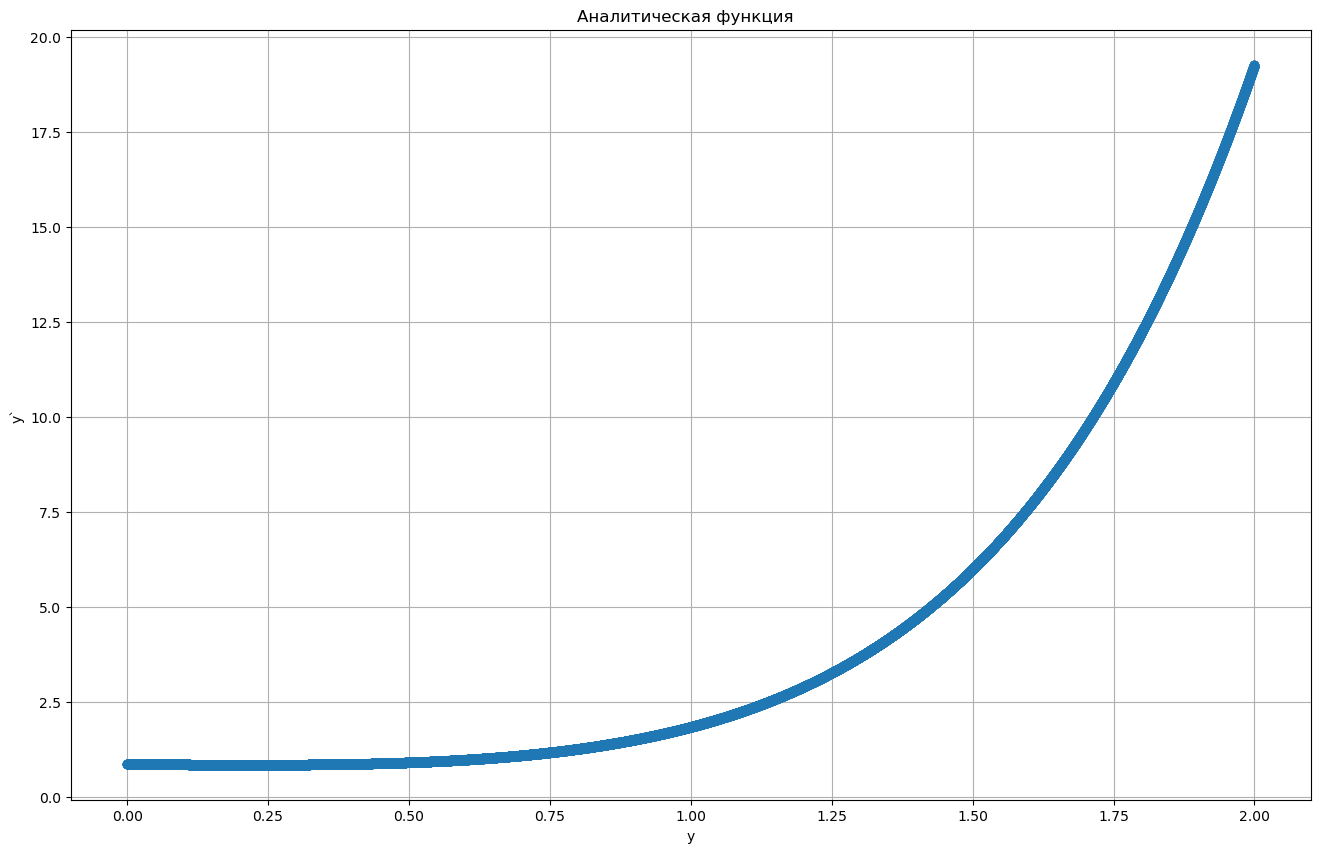

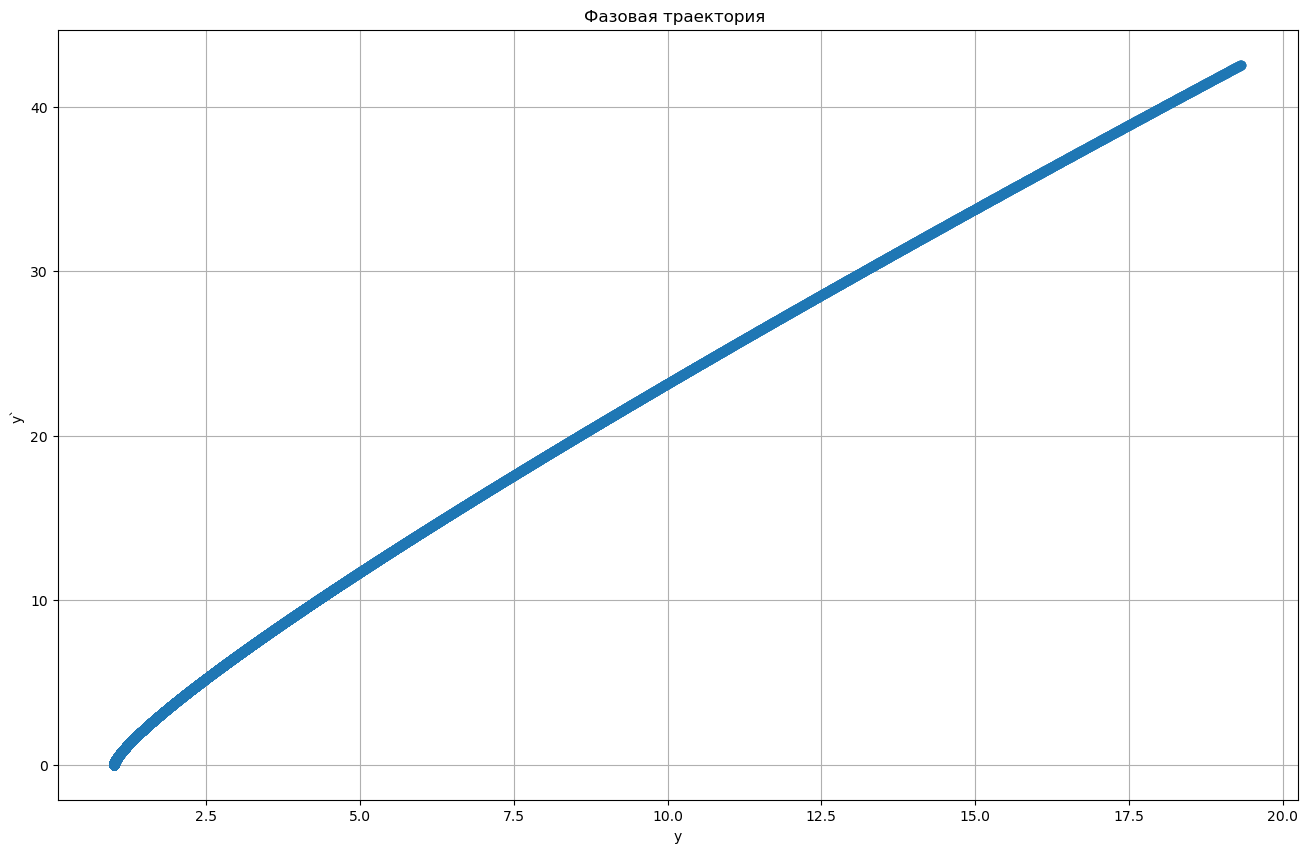

C:\Users\Ivan\AppData\Local\Temp\ipykernel_13192\2477447777.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pylab.plot(x, y-sol[:, 0], 'r-')


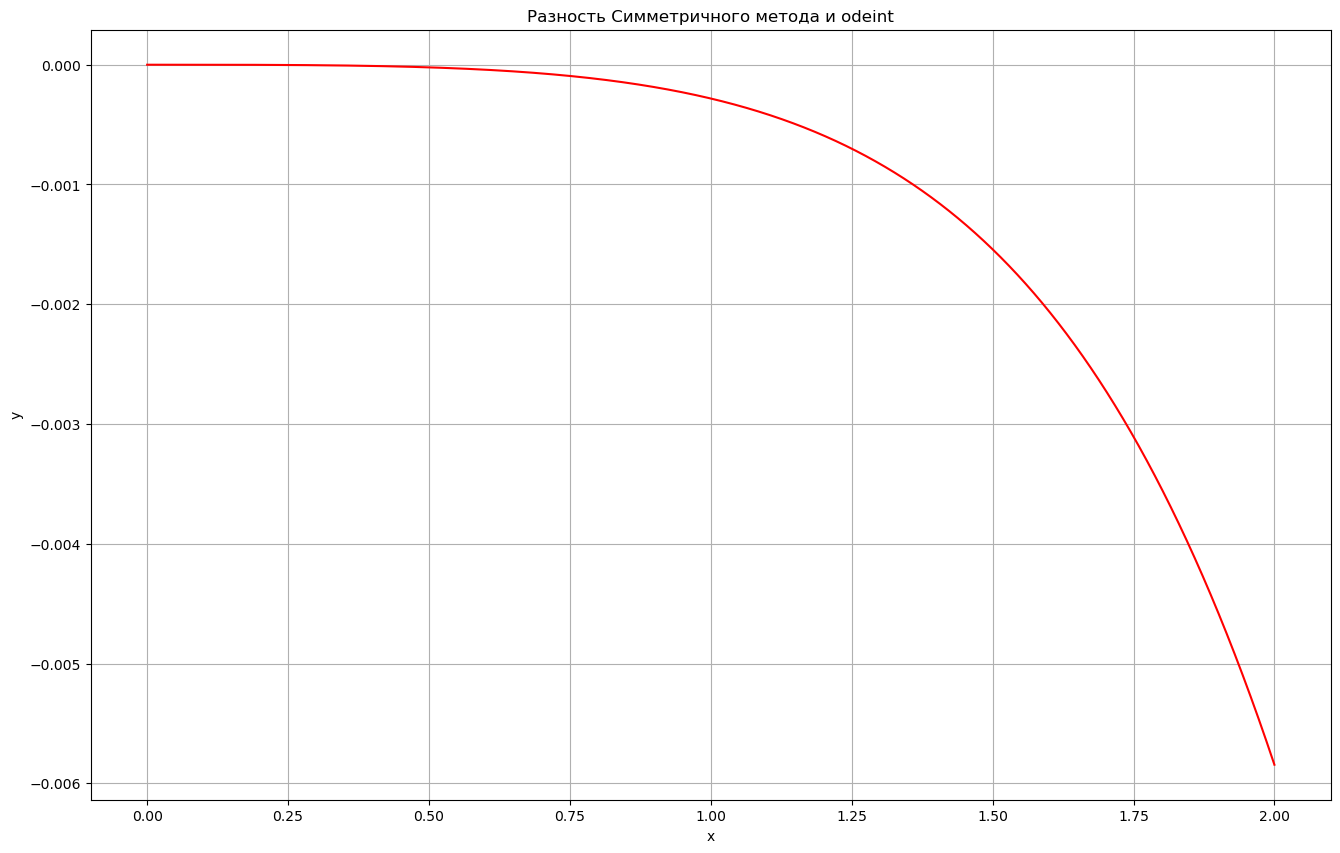

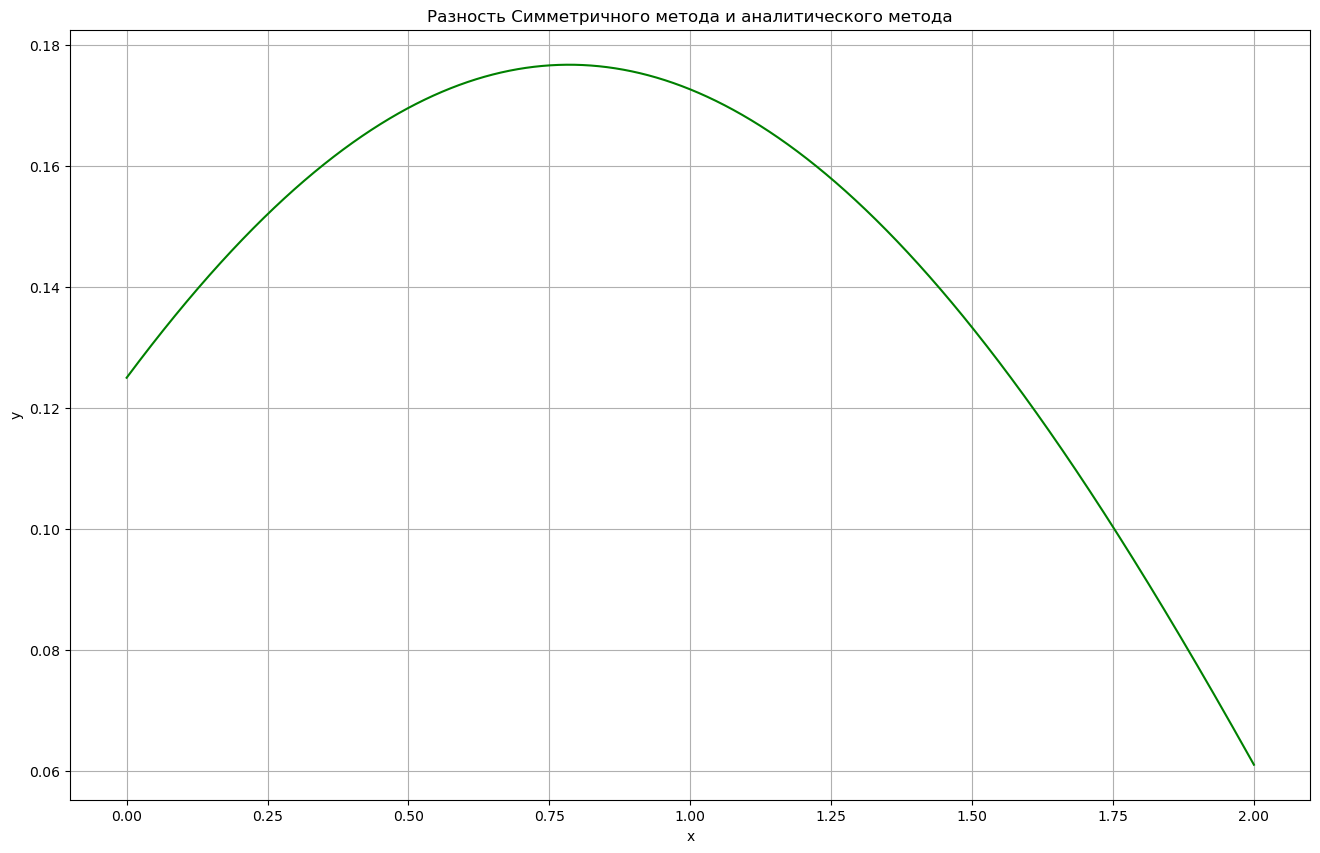

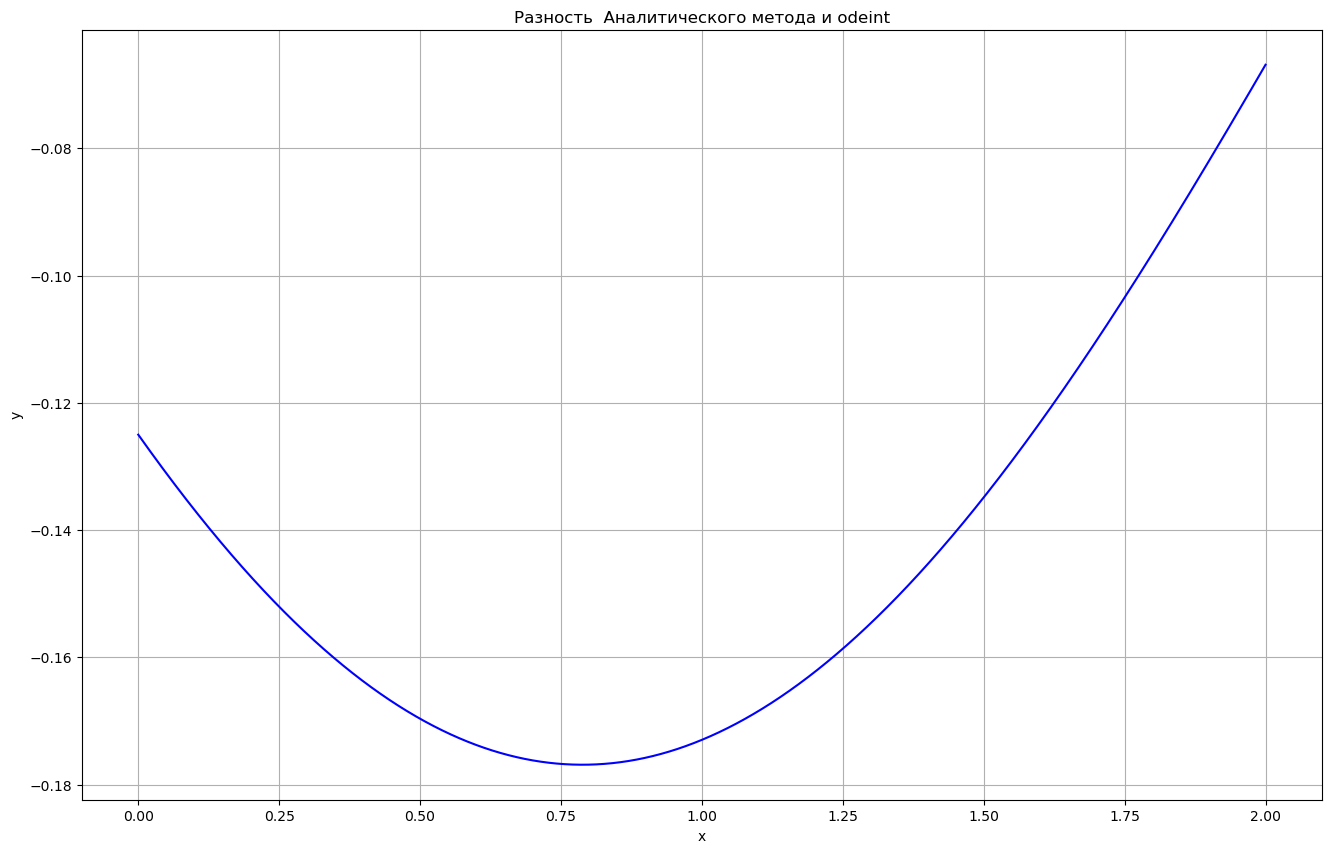

In [10]:
import numpy as np
import math as mp
import matplotlib.pyplot as plt
import pylab
import scipy 
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def func(y, x):
    return [y[ 1], y[2], +2*y[2] - y[1] + 2*y[0] + np.cos(x)*np.exp(2*x)]
def YA(x):#Аналитическая функция 
    return (1/8)*(np.exp(2*x)*np.sin(x)-np.exp(2*x)*np.cos(x)) +(-2/5)*np.sin(x)+(4/5)*np.cos(x)+ +(1/5)*np.exp(2*x) 
def Symmetric_implicit(Y,h,eps,A):
    def fi(x):
        return np.array([[0],[0],[np.cos(x)*np.exp(2*x)]])
    def search(x,Y,h,A):
        h=h
        Yn=Y
        A=A
        E=np.identity(3)
        prom=E+(1/2.)*A*h
        left=np.linalg.inv(prom)
        right=h*fi(x)+Yn - (1/2.)*h*np.dot(A,Yn)
        Yn=np.dot(left,right)
        return Yn
    #Первая прогонка
    h=h
    j=0
    A=A
    y,y1=[Y[0]],[Y[1]]
    x=np.arange(0,2,h)
    Yn=search(x[0],Y,h,A)
    y.append(Yn[0][0])
    y1.append(Yn[1][0])
    for i in range(1,len(x)-1):
            Yn=search(x[i],Yn,h,A)
            y.append(Yn[0][0])
            y1.append(Yn[1][0])
    h/=2 
    
    rez={}#Массив для хранения и проверки y
    rez[j]=y
    
    a=True 
    while a:#Основной цикл уменьшения h
        j+=1
        y,y1=[Y[0]],[Y[1]]
        x=np.arange(0,2,h)
        Yn=search(x[0],Y,h,A)
        y.append(Yn[0][0])
        y1.append(Yn[1][0])
       
        for i in range(1,len(x)-1):
            Yn=search(x[i],Yn,h,A)
            y.append(Yn[0][0])
            y1.append(Yn[1][0])
        h/=2  
        
        
        rez[j]=y
        a=(rez[j][len(rez[j])-1]-rez[j-1][len(rez[j-1])-1])>eps
    return x,y,y1,h

# Определяем начальные условия
Y=np.array([[1],[0],[0]])
A=np.array([[0,-1,0],[0,0,-1],[-2,1,-2]])
h=0.5
eps=0.01
x,y,y1,h=Symmetric_implicit(Y,h,eps,A)
print(h)
#odeint
y0 = np.array([1, 0, 0])
x1 = np.linspace(0, 2, len(x))
sol = spi.odeint(func, y0, x1)

#Аналитическая фуннкция
yA=[YA(x[i]) for i in range(len(x))]
yraz=[y[i]-YA(x[i]) for i in range(len(x))]
# График решения
pylab.figure(figsize = (16, 10))
plt.plot(x1, sol[:, 0], 'b')
pylab.plot(x, y, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Наложение odeint на Cимметрический неявный метод  ')
plt.show()

pylab.figure(figsize = (16, 10))
pylab.title('Cимметрический неявный метод')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(x, y, 'o-')
pylab.show()

pylab.figure(figsize = (16, 10))
plt.plot(x1, sol[:, 0], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title(' Odeint  ')
plt.show()

pylab.figure(figsize = (16, 10))
pylab.title('Аналитическая функция  ')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(x, yA, 'o-')
pylab.show()

pylab.figure(figsize = (16, 10))
pylab.title('Фазовая траектория ')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(y, y1, 'o-')
pylab.show()

pylab.figure(figsize = (16, 10))
pylab.title('Разность Симметричного метода и odeint')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, y-sol[:, 0], 'r-')
pylab.show()

pylab.figure(figsize = (16, 10))
pylab.title('Разность Симметричного метода и аналитического метода')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, yraz, 'g-')
pylab.show()

pylab.figure(figsize = (16, 10))
pylab.title('Разность  Aналитического метода и odeint')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, yA-sol[:, 0], 'b-')
pylab.show()


0.03125


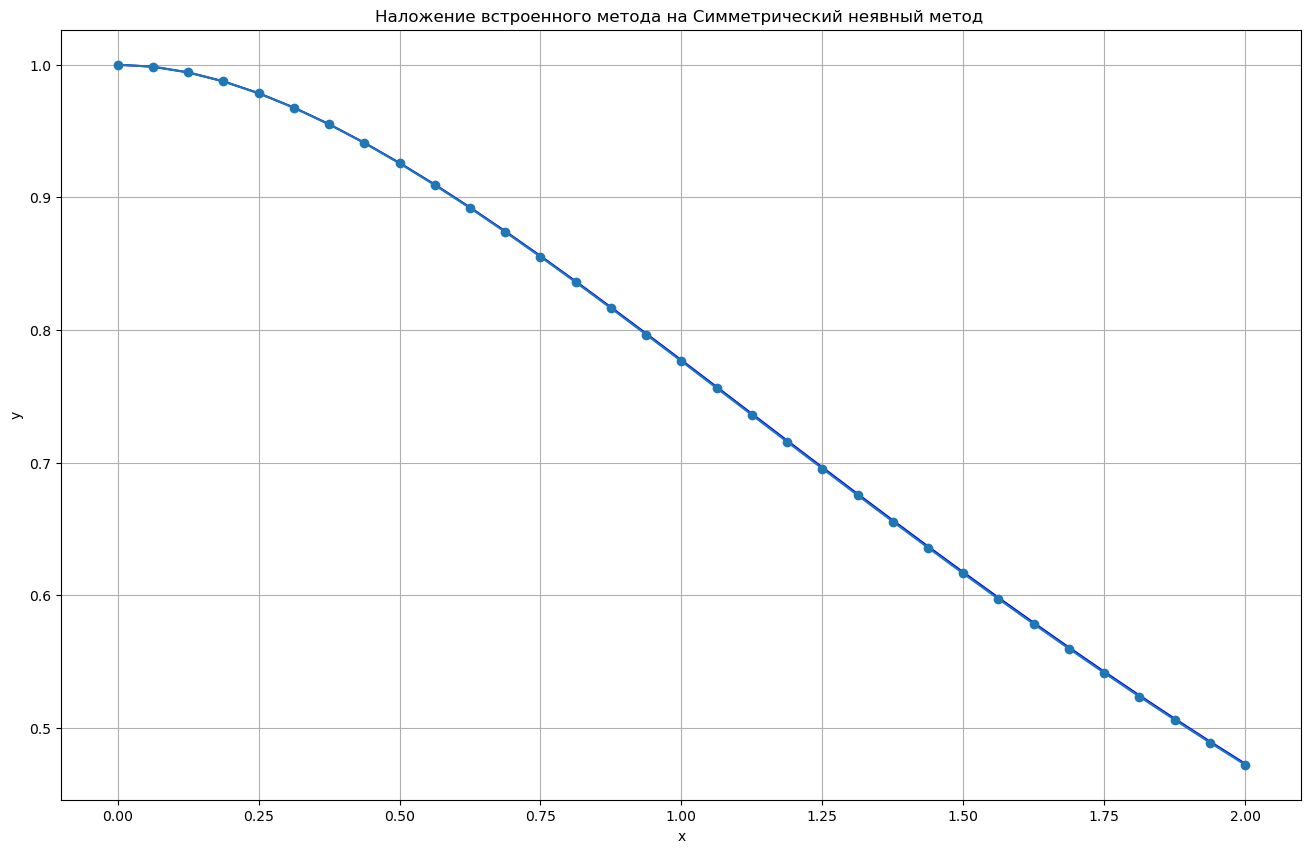

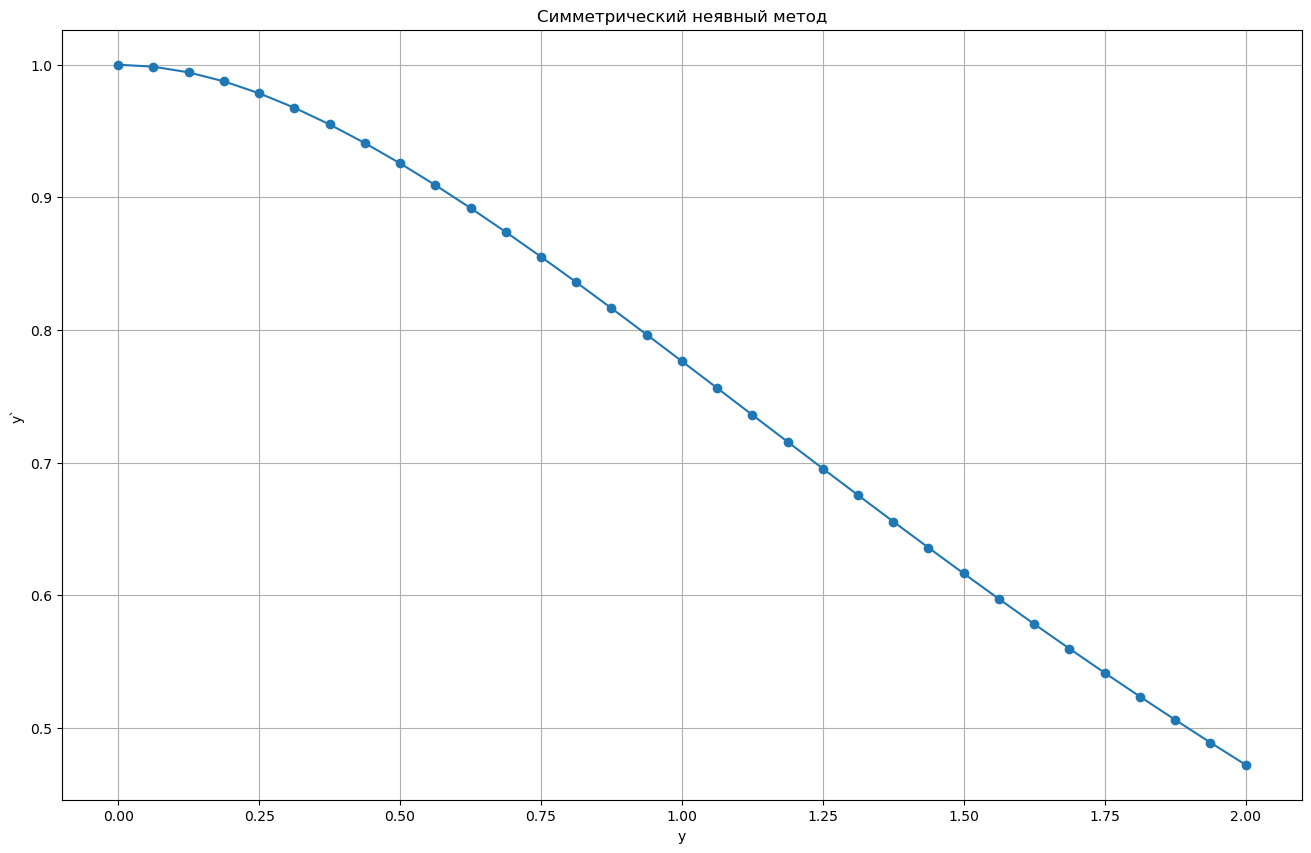

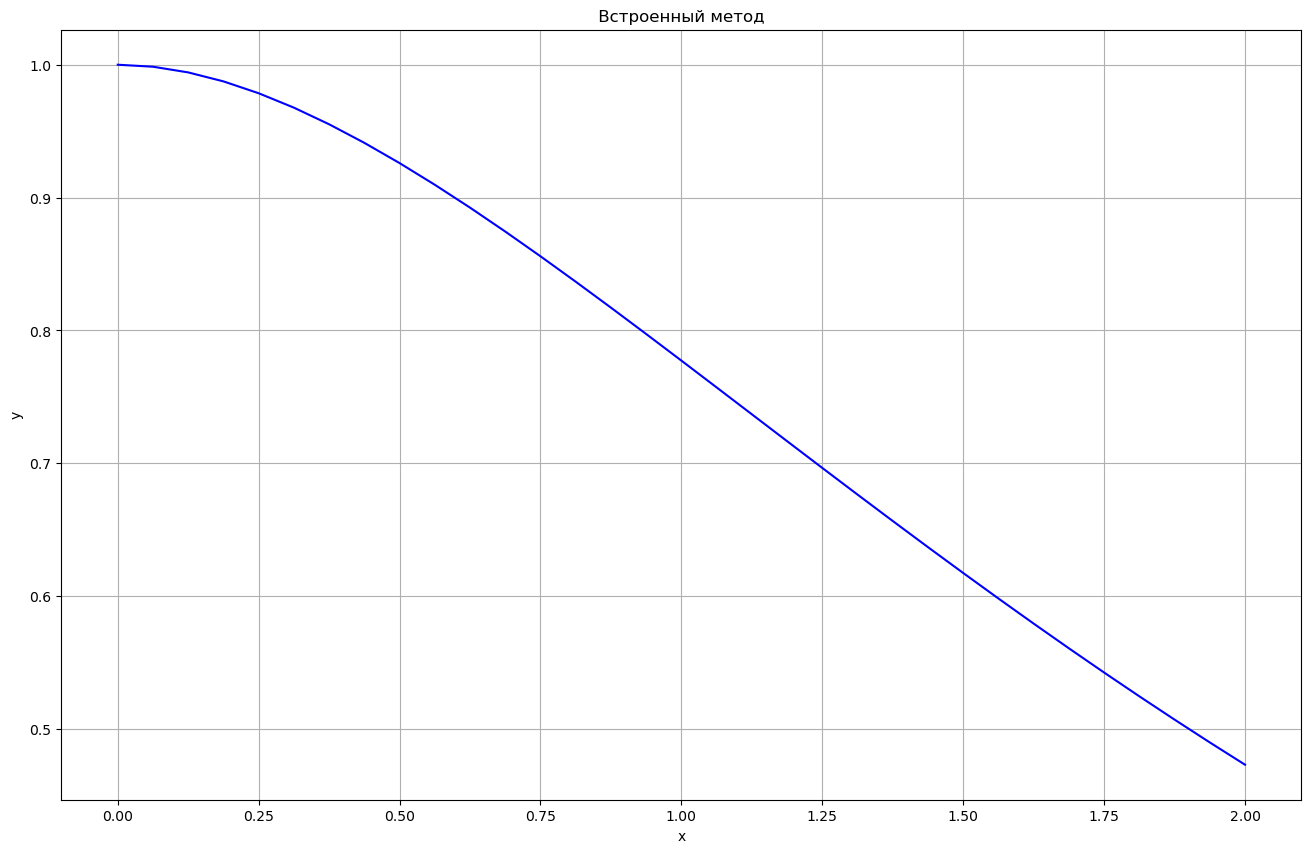

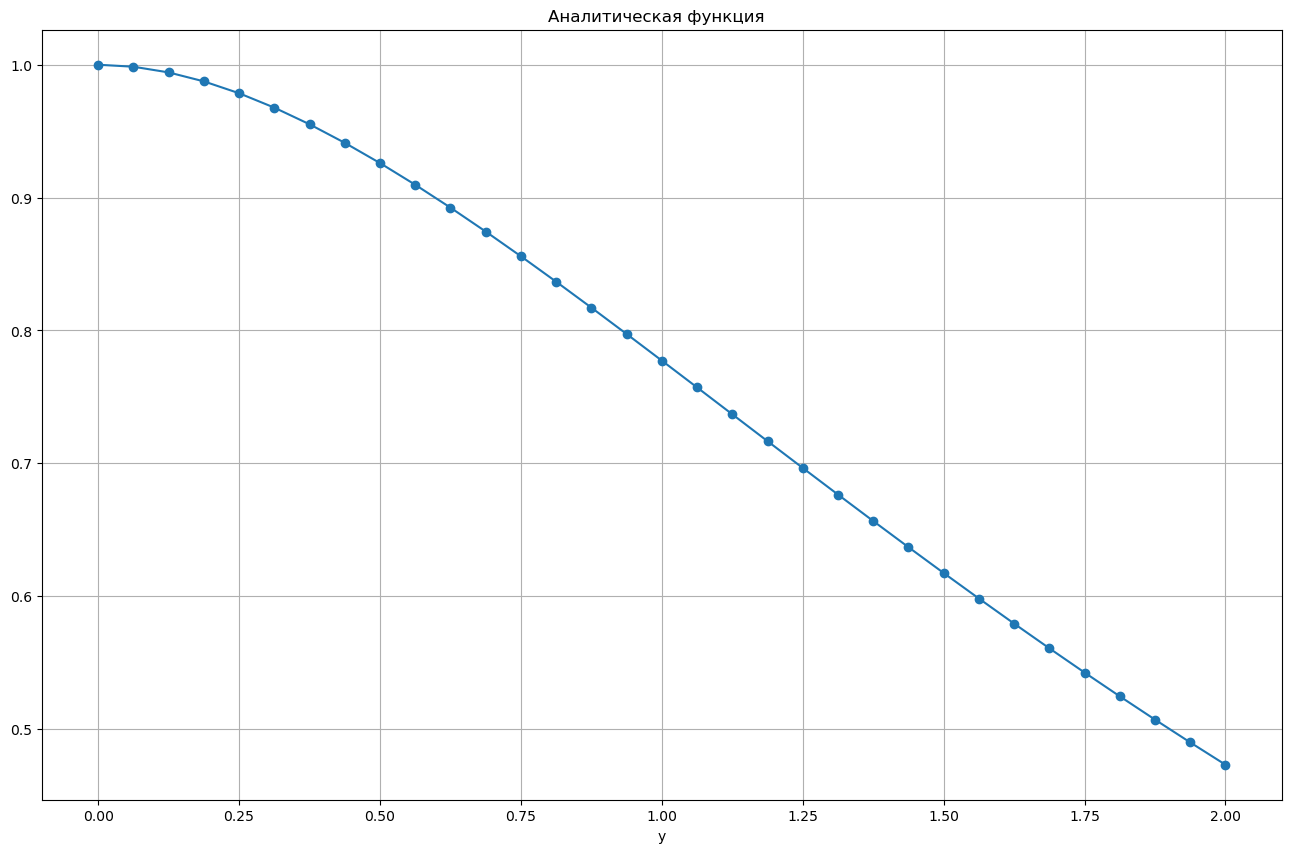

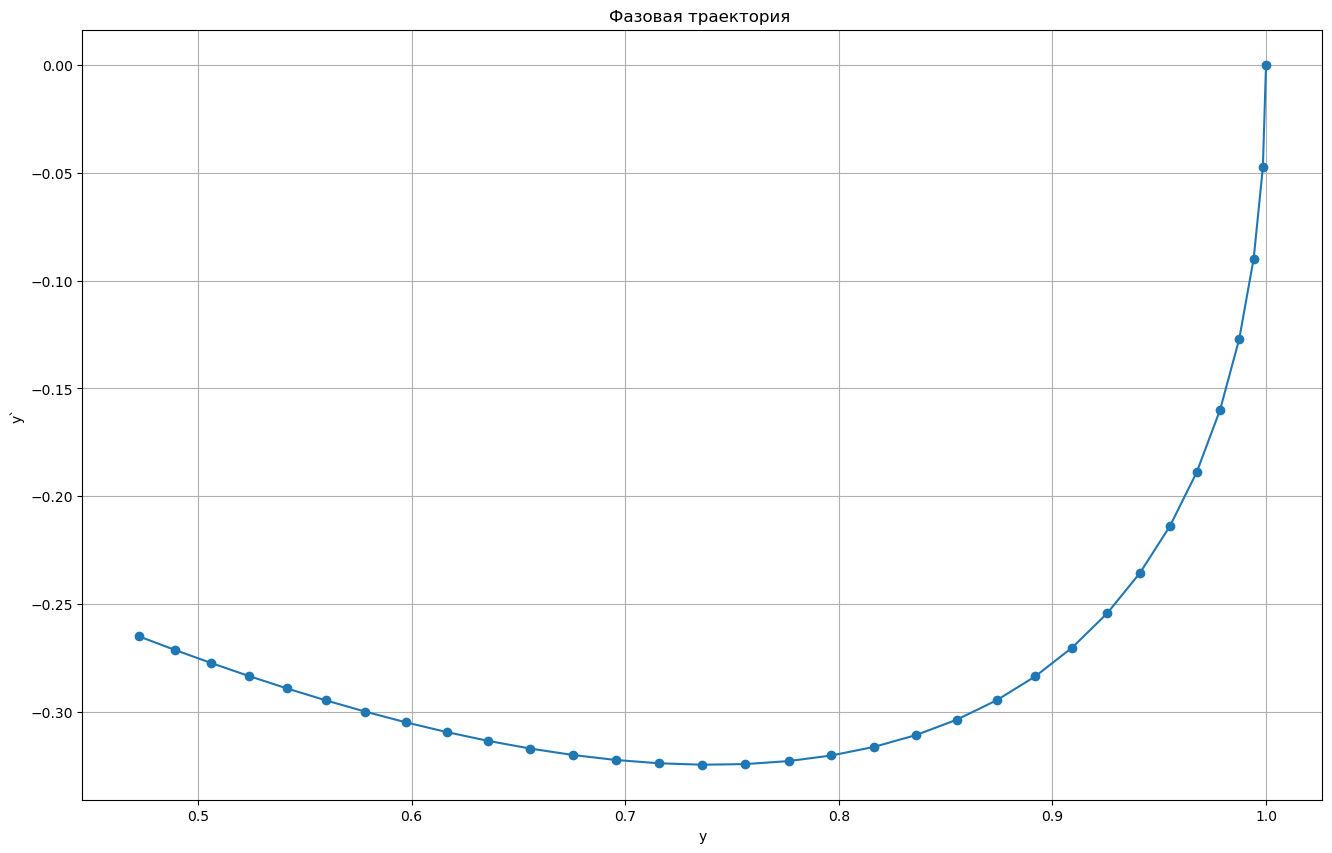

C:\Users\Ivan\AppData\Local\Temp\ipykernel_21464\293703154.py:142: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pylab.plot(x, y-sol[:, 0], 'r-')


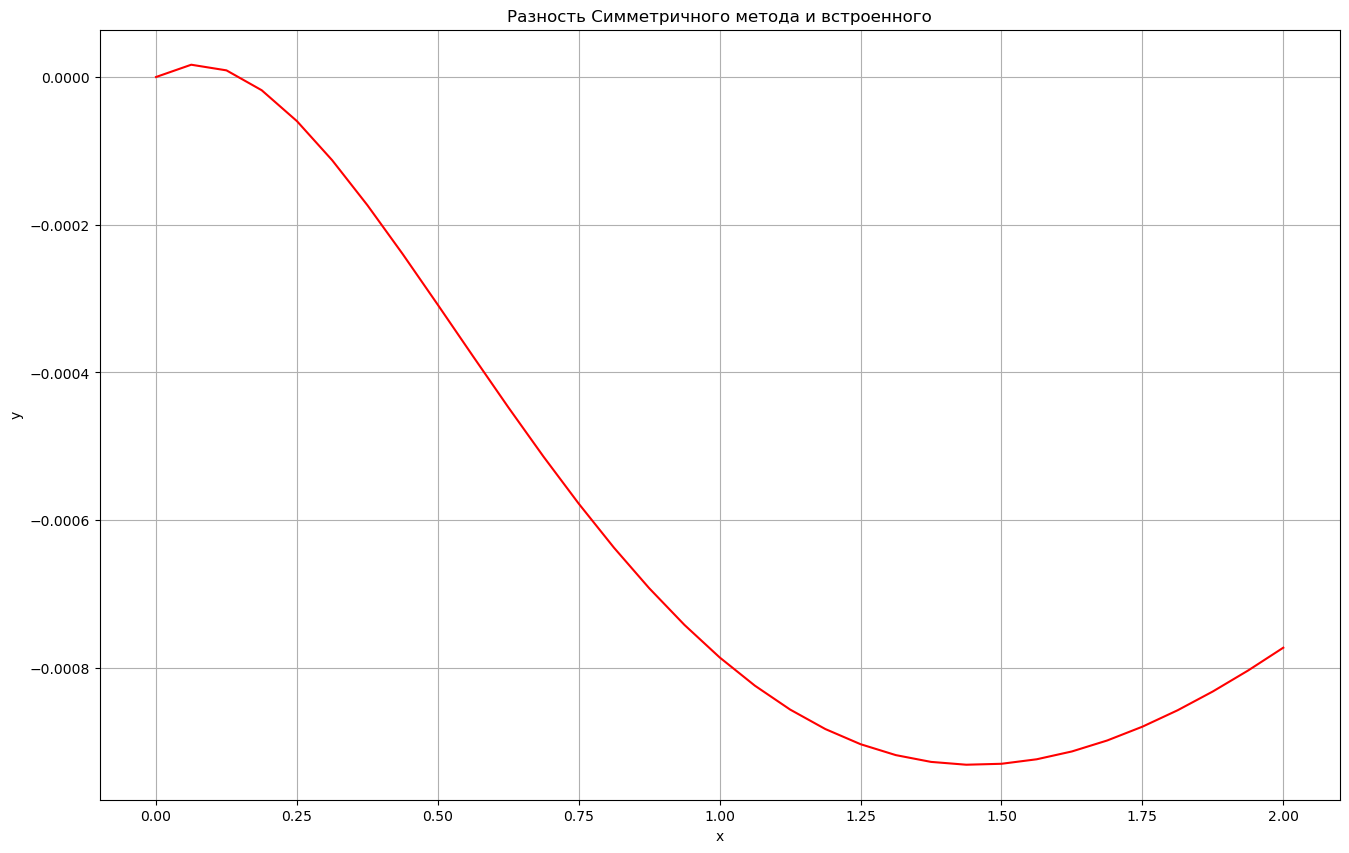

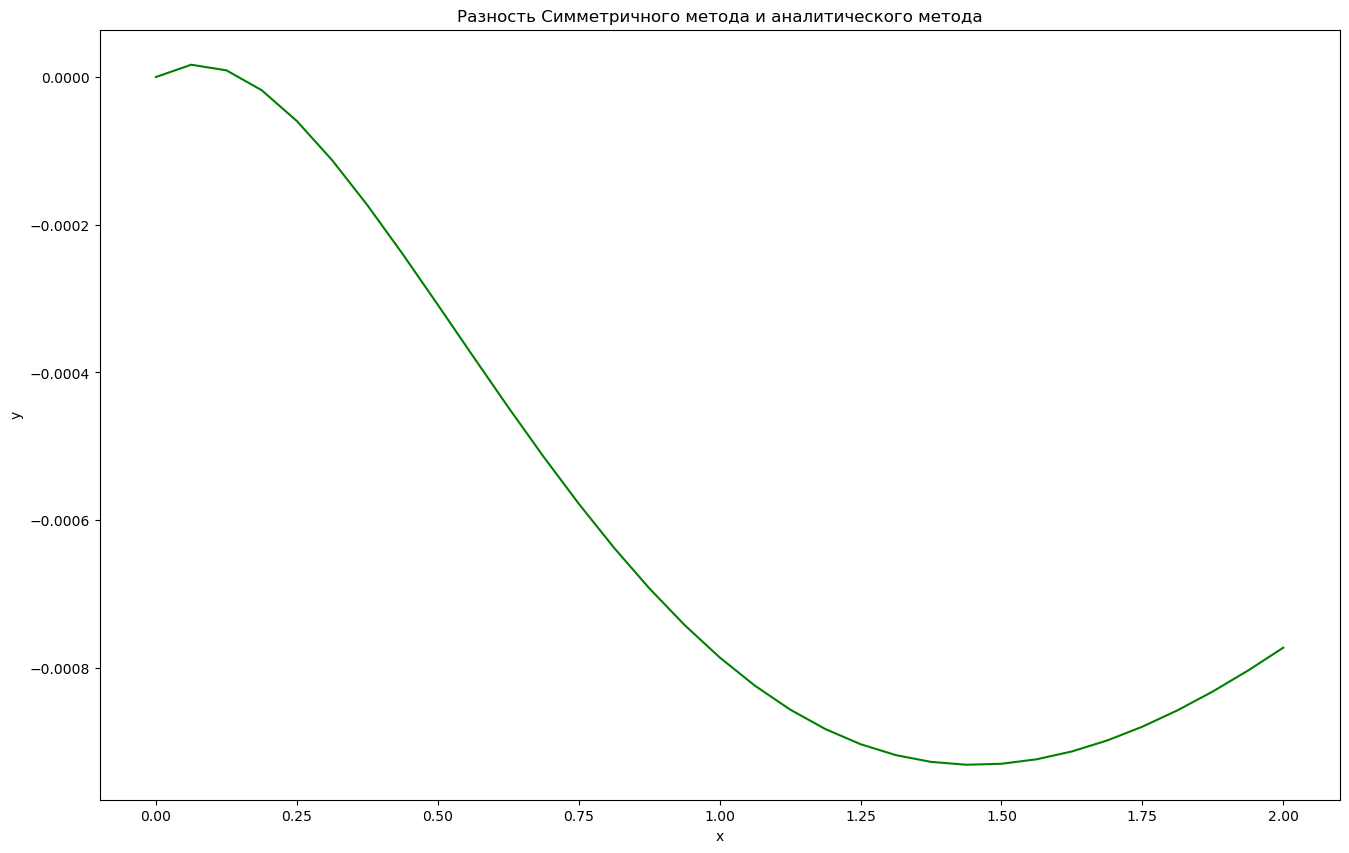

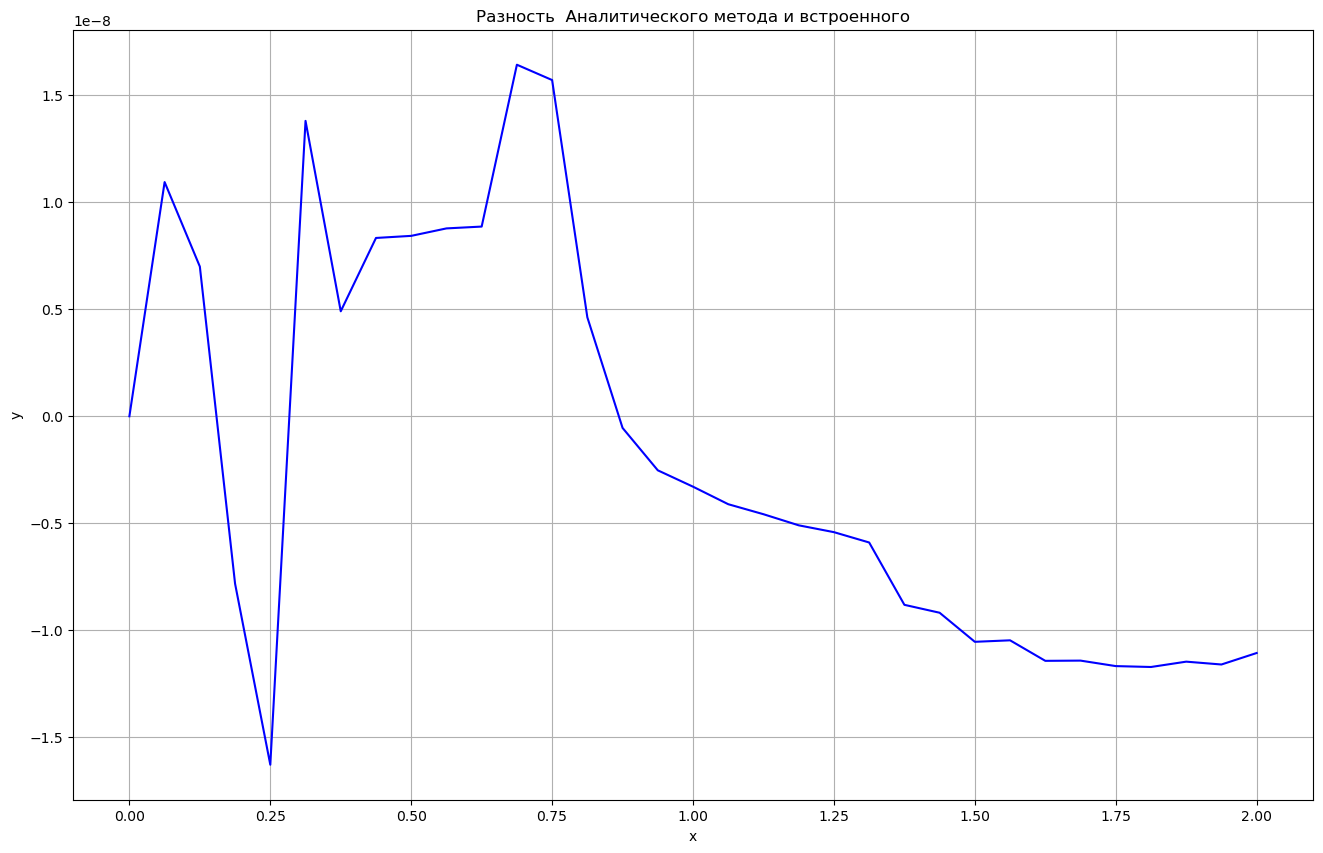

In [18]:
import numpy as np
import math as mp
import matplotlib.pyplot as plt
import pylab
import scipy 
import pdb
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

Y=np.array([[1],[0]])
A=np.array([[0,-1],[4/5,8/5]])
h=0.5
eps=0.01


def func(y, x):
    return [y[1], (x*np.exp(-x)-8*y[1]-4*y[0])/5]

#аналитическая функция
def YA(x):
    return np.exp((-4/5)*x)*((1/2)*np.sin((2/5)*x)-np.cos((2/5)*x))+(x+2)*np.exp(-x)
 
def Simetric (Y,h,eps,A):
    def fi(x):
        return np.asanyarray([[0],[(x*np.exp(-x))/5]])
    
    def poisk(x,Y,h,A):
        h = h
        Yn = Y
        A = A
        E=np.identity(2)
        B = E + (1/2)*A*h
        #обратная матрица для B
        left = np.linalg.inv(B)
        right = h*fi(x) + Yn - (1/2)*h*np.dot(A,Yn)
        Yn = np.dot(left,right)
        return Yn
    
    #Первая прогонка массива у
    h = h# h=0.5
    j = 0
    A = A
    eps=eps
    y,y1 = [Y[0]],[Y[1]]
    x=np.arange(0,2+h,h)
    Yn = poisk(x[0],Y,h,A)
    y.append(Yn[0][0])
    y1.append(Yn[1][0])
    for i in range(1,len(x)-1):
            Yn=poisk(x[i],Yn,h,A)
            y.append(Yn[0][0])
            y1.append(Yn[1][0])
    
    h/=2 
    
    rez={}#Массив для хранения и проверки y
    rez[j]=y
    
    a = True 
    while a:#Основной цикл уменьшения h
        j+=1
        y,y1=[Y[0]],[Y[1]]
        x=np.arange(0,2+h,h)
        Yn=poisk(x[0],Y,h,A)
        y.append(Yn[0][0])
        y1.append(Yn[1][0])
        for i in range(1,len(x)-1):
            Yn=poisk(x[i],Yn,h,A)
            y.append(Yn[0][0])
            y1.append(Yn[1][0])
       
        h/=2  
        
        
        rez[j]=y
        a=(rez[j][len(rez[j])-1]-rez[j-1][len(rez[j-1])-1])>eps
    return x,y,y1,h

Y=np.array([[1],[0]])
A=np.asanyarray([[0,-1],[4/5,8/5]])
h=0.5
eps=0.001
    
x,y,y1,h = Simetric(Y,h,eps,A)
print(h)
#odeint
y0 = np.array([1, 0])
x1 = np.linspace(0, 2, len(x))

sol = spi.odeint(func, y0, x1)
    
#Аналитическая фуннкция
yA=[YA(x[i]) for i in range(len(x))]
yraz=[y[i]-YA(x[i]) for i in range(len(x))]
# График решения
pylab.figure(figsize = (16, 10))
plt.plot(x1, sol[:, 0], 'b')
pylab.plot(x, y, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Наложение встроенного метода на Cимметрический неявный метод ')
plt.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Cимметрический неявный метод')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(x, y, 'o-')
pylab.show()
    
pylab.figure(figsize = (16, 10))
plt.plot(x1, sol[:, 0], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title(' Встроенный метод ')
plt.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Аналитическая функция  ')
pylab.xlabel('y')
plt.grid(True)
pylab.plot(x, yA, 'o-')
pylab.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Фазовая траектория ')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(y, y1, 'o-')
pylab.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Разность Симметричного метода и встроенного')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, y-sol[:, 0], 'r-')
pylab.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Разность Симметричного метода и аналитического метода')
pylab.xlabel('x')
pylab.ylabel('y')
pylab.plot(x, yraz, 'g-')
pylab.show()
    
pylab.figure(figsize = (16, 10))
pylab.title('Разность  Aналитического метода и встроенного')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, yA-sol[:, 0], 'b-')
pylab.show()